# Challange Data Science - Alura

### Importando e organizando a base de dados

Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de se **reduzir a Taxa de Evasão** de Clientes, conhecido como **Churn Rate**. Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

In [ ]:
import pandas as pd #importando o pandas

In [ ]:
# importando a base de dados disponibilizada pela API da ALURA VOZ
base = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
dados = pd.read_json(base)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Extraindo  e normalizando os dados das colunas que apresentam o formato json.

In [ ]:
# Extração coluna "customer"
dados_customer = pd.json_normalize(data=dados.customer)
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [ ]:
# Extração coluna "phone"
dados_phone = pd.json_normalize(data=dados.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [ ]:
# Extração coluna "internet"
dados_internet = pd.json_normalize(data=dados.internet)
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [ ]:
# Extração coluna "account"
dados_account = pd.json_normalize(data=dados.account)
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [ ]:
# listando os dados da coluna "churn"
dados_ch = list(dados['Churn'])
dados_ch = pd.DataFrame(dados_ch)
dados_ch

,0
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [ ]:
# listando os dados da coluna "customerID"
dados_id = list(dados['customerID'])
dados_id = pd.DataFrame(dados_id)
dados_id

,0
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


In [ ]:
# Concatenando as tabelas
dataset = pd.concat([dados_ch, dados_id, dados_customer, dados_phone, dados_internet, dados_account], axis = 1)
dataset.head(10)

,0,0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,No,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,No,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,No,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,No,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,No,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [ ]:
# Renomeando as colunas
dataset.columns = ["churn", "id", "genero", "idoso", "parceiro", "dependentes", "Meses_adesao", "servico_telefone", "outras_linhas_telefonicas", "servico_internet", "seguranca_online", "backup_online", "protecao_dispositivo", "suporte_tecnico", "servico_tv", "servico_streaming", "contrato", "pagamento_digital", "metodo_pagamento", "cobranca_mensal", "cobranca_total"] 
dataset.head()

,churn,id,genero,idoso,parceiro,dependentes,Meses_adesao,servico_telefone,outras_linhas_telefonicas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,servico_tv,servico_streaming,contrato,pagamento_digital,metodo_pagamento,cobranca_mensal,cobranca_total
0,No,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Verificando e tratando os dados das colunas que possuem valores vazios e/ou nulos.

In [ ]:
# Informações do DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7267 non-null   object 
 1   id                         7267 non-null   object 
 2   genero                     7267 non-null   object 
 3   idoso                      7267 non-null   int64  
 4   parceiro                   7267 non-null   object 
 5   dependentes                7267 non-null   object 
 6   Meses_adesao               7267 non-null   int64  
 7   servico_telefone           7267 non-null   object 
 8   outras_linhas_telefonicas  7267 non-null   object 
 9   servico_internet           7267 non-null   object 
 10  seguranca_online           7267 non-null   object 
 11  backup_online              7267 non-null   object 
 12  protecao_dispositivo       7267 non-null   object 
 13  suporte_tecnico            7267 non-null   objec

In [ ]:
# Dados NAN
dataset[dataset.isna()].count()

churn                        0
id                           0
genero                       0
idoso                        0
parceiro                     0
dependentes                  0
Meses_adesao                 0
servico_telefone             0
outras_linhas_telefonicas    0
servico_internet             0
seguranca_online             0
backup_online                0
protecao_dispositivo         0
suporte_tecnico              0
servico_tv                   0
servico_streaming            0
contrato                     0
pagamento_digital            0
metodo_pagamento             0
cobranca_mensal              0
cobranca_total               0
dtype: int64

In [ ]:
# Verificando valores vazios
dataset[dataset == ' '].count()

churn                         0
id                            0
genero                        0
idoso                         0
parceiro                      0
dependentes                   0
Meses_adesao                  0
servico_telefone              0
outras_linhas_telefonicas     0
servico_internet              0
seguranca_online              0
backup_online                 0
protecao_dispositivo          0
suporte_tecnico               0
servico_tv                    0
servico_streaming             0
contrato                      0
pagamento_digital             0
metodo_pagamento              0
cobranca_mensal               0
cobranca_total               11
dtype: int64

In [ ]:
dataset[dataset == ''].count()

churn                        224
id                             0
genero                         0
idoso                          0
parceiro                       0
dependentes                    0
Meses_adesao                   0
servico_telefone               0
outras_linhas_telefonicas      0
servico_internet               0
seguranca_online               0
backup_online                  0
protecao_dispositivo           0
suporte_tecnico                0
servico_tv                     0
servico_streaming              0
contrato                       0
pagamento_digital              0
metodo_pagamento               0
cobranca_mensal                0
cobranca_total                 0
dtype: int64

In [ ]:
dataset.query("cobranca_total == ' '")

,churn,id,genero,idoso,parceiro,dependentes,Meses_adesao,servico_telefone,outras_linhas_telefonicas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,servico_tv,servico_streaming,contrato,pagamento_digital,metodo_pagamento,cobranca_mensal,cobranca_total
975,No,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,No,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,No,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,No,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,No,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,No,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,No,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,No,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,No,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [ ]:
# Preencher com '0' as cobranças vazias
dataset['cobranca_total'].replace(' ', 0, inplace=True)

In [ ]:
#Alterando o tipo de dado da coluna "cobranca_total" para float.
dataset['cobranca_total'] = dataset['cobranca_total'].astype('float')

In [ ]:
# Informações da coluna target "churn"
dataset['churn'].value_counts()

No     5174
Yes    1869
        224
Name: churn, dtype: int64

In [ ]:
# Trocando os 224 valores vazios por "Sem informação"
dataset['churn'].replace('', 'Sem informação', inplace=True)
dataset['churn'].value_counts()

No                5174
Yes               1869
Sem informação     224
Name: churn, dtype: int64

### Visualizando os dados relacionando com variável Churn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Análise Churn')

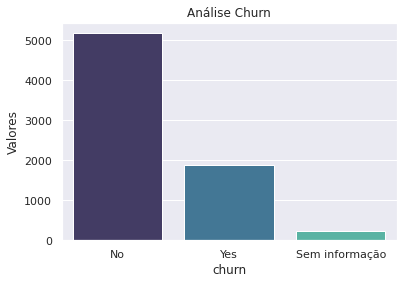

In [ ]:
# GRÁFICO DE BARRAS

sns.countplot(x='churn', data=dataset, palette='mako')
plt.ylabel('Valores')
plt.title('Análise Churn')

In [ ]:
#  "yes" corresponde aos ativos e "no" cancelados

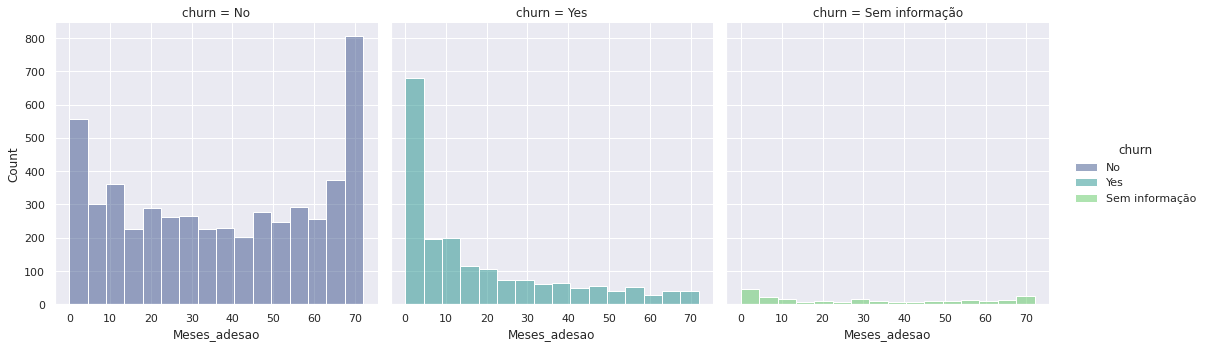

In [ ]:
# HISTOGRAMA MESES DE ADESÃO X CHURN

fig = sns.displot(data=dataset, x='Meses_adesao', col='churn', hue='churn', palette='viridis')
plt.show(fig)

In [ ]:
# Podemos perceber que a maior parte dos clientes costumam cancelar o plano nos primeiros 5 meses de adesão

Text(0.5, 1.0, 'Churn x Gênero')

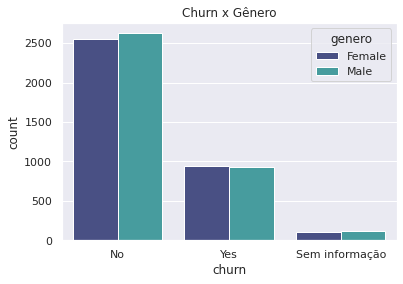

In [ ]:
# GRÁFICO DE BARRAS CHURN X GENERO

ax = sns.countplot(x="churn", hue="genero", data=dataset, palette='mako')
plt.title('Churn x Gênero')

In [ ]:
# O gênero não está relacionado com os cancelamentos

Text(0.5, 1.0, 'Churn x Dependentes')

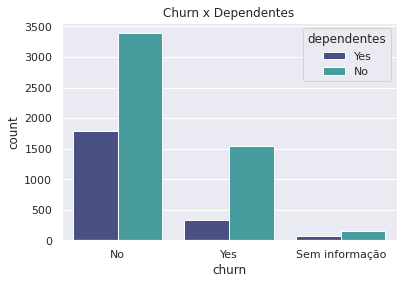

In [ ]:
# GRÁFICO DE BARRAS CHURN X DEPENDENTES

ax = sns.countplot(x="churn", hue="dependentes", data=dataset, palette='mako')
plt.title('Churn x Dependentes')

In [ ]:
# Pessoas sem dependentes cancelam mais o plano

Text(0.5, 1.0, 'Churn x Serviço de Internet')

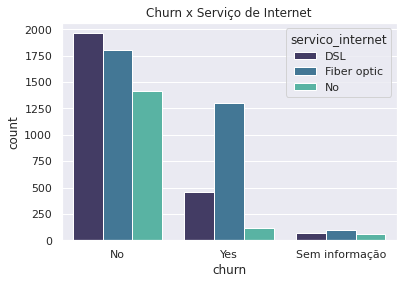

In [ ]:
# GRÁFICO DE BARRAS CHURN X SERVIÇO DE INTERNET

ax = sns.countplot(x="churn", hue="servico_internet", data=dataset, palette='mako')
plt.title('Churn x Serviço de Internet')

In [ ]:
# Pessoas com internet de fibra óptica são mais propensas a cancelar

Text(0.5, 1.0, 'Churn x Serviço de TV a cabo')

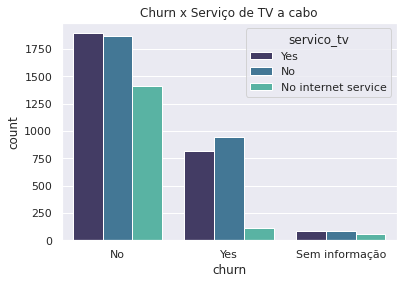

In [ ]:
# GRÁFICO DE BARRAS CHURN X SERVIÇO DE TV A CABO

ax = sns.countplot(x="churn", hue="servico_tv", data=dataset, palette='mako')
plt.title('Churn x Serviço de TV a cabo')



Text(0.5, 1.0, 'Churn x Método de pagamento')

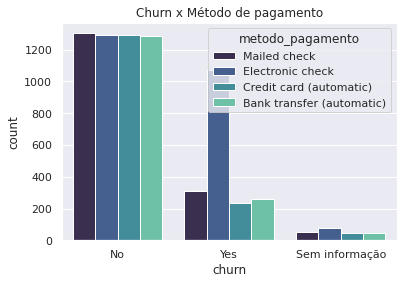

In [ ]:
# GRÁFICO DE BARRAS CHURN X MÉTODO DE PAGAMENTO

ax = sns.countplot(x="churn", hue="metodo_pagamento", data=dataset, palette='mako')
plt.title('Churn x Método de pagamento')


In [ ]:
# A maior parte do cancelamentos vem de pessoas que optaram pelo método de cheque eletrônico

### Correlação








In [ ]:
# Informações do DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7267 non-null   object 
 1   id                         7267 non-null   object 
 2   genero                     7267 non-null   object 
 3   idoso                      7267 non-null   int64  
 4   parceiro                   7267 non-null   object 
 5   dependentes                7267 non-null   object 
 6   Meses_adesao               7267 non-null   int64  
 7   servico_telefone           7267 non-null   object 
 8   outras_linhas_telefonicas  7267 non-null   object 
 9   servico_internet           7267 non-null   object 
 10  seguranca_online           7267 non-null   object 
 11  backup_online              7267 non-null   object 
 12  protecao_dispositivo       7267 non-null   object 
 13  suporte_tecnico            7267 non-null   objec

In [ ]:
# Variáveis do tipo objeto não são lidas na correlação

In [ ]:
dataset.select_dtypes(include=object).columns

Index(['churn', 'id', 'genero', 'parceiro', 'dependentes', 'servico_telefone',
       'outras_linhas_telefonicas', 'servico_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'servico_tv', 'servico_streaming', 'contrato', 'pagamento_digital',
       'metodo_pagamento'],
      dtype='object')

In [ ]:
#Convertendo para categórico
for i in ['churn', 'id', 'genero', 'parceiro', 'dependentes', 'servico_telefone',
       'outras_linhas_telefonicas', 'servico_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'servico_tv', 'servico_streaming', 'contrato', 'pagamento_digital',
       'metodo_pagamento']:
    dataset[i] = dataset[i].astype('category')
dataset.dtypes

churn                        category
id                           category
genero                       category
idoso                           int64
parceiro                     category
dependentes                  category
Meses_adesao                    int64
servico_telefone             category
outras_linhas_telefonicas    category
servico_internet             category
seguranca_online             category
backup_online                category
protecao_dispositivo         category
suporte_tecnico              category
servico_tv                   category
servico_streaming            category
contrato                     category
pagamento_digital            category
metodo_pagamento             category
cobranca_mensal               float64
cobranca_total                float64
dtype: object

In [ ]:
#Convertendo para inteiro
for i in ['churn', 'id', 'genero', 'parceiro', 'dependentes', 'servico_telefone',
       'outras_linhas_telefonicas', 'servico_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'servico_tv', 'servico_streaming', 'contrato', 'pagamento_digital',
       'metodo_pagamento']:
    dataset[i] = dataset[i].cat.codes
dataset.dtypes

churn                           int8
id                             int16
genero                          int8
idoso                          int64
parceiro                        int8
dependentes                     int8
Meses_adesao                   int64
servico_telefone                int8
outras_linhas_telefonicas       int8
servico_internet                int8
seguranca_online                int8
backup_online                   int8
protecao_dispositivo            int8
suporte_tecnico                 int8
servico_tv                      int8
servico_streaming               int8
contrato                        int8
pagamento_digital               int8
metodo_pagamento                int8
cobranca_mensal              float64
cobranca_total               float64
dtype: object

In [ ]:
correlation = dataset.corr()
correlation

,churn,id,genero,idoso,parceiro,dependentes,Meses_adesao,servico_telefone,outras_linhas_telefonicas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,servico_tv,servico_streaming,contrato,pagamento_digital,metodo_pagamento,cobranca_mensal,cobranca_total
churn,1.000000,-0.014863,-0.007448,0.148432,-0.146341,-0.160281,-0.345607,0.010881,0.037469,-0.044752,...,-0.191600,-0.175520,-0.277400,-0.035855,-0.037696,-0.390222,0.189174,0.105814,0.188562,-0.194826
id,-0.014863,1.000000,0.005205,-0.004454,-0.022487,-0.010729,0.006448,-0.007620,0.002820,-0.012679,...,-0.003437,-0.007791,0.003646,-0.006859,-0.016524,0.012266,0.001136,0.013407,-0.003744,0.000450
genero,-0.007448,0.005205,1.000000,-0.004288,-0.005007,0.012038,0.005765,-0.005073,-0.006544,0.000627,...,-0.011617,0.000006,-0.006573,-0.006347,-0.010795,-0.002009,-0.011273,0.019876,-0.013889,0.000367
idoso,0.148432,-0.004454,-0.004288,1.000000,0.022970,-0.212952,0.018187,0.010060,0.147433,-0.032584,...,-0.011327,-0.020565,-0.150126,0.028770,0.046279,-0.140570,0.157734,-0.039769,0.220388,0.104076
parceiro,-0.146341,-0.022487,-0.005007,0.022970,1.000000,0.448900,0.377551,0.018828,0.141172,0.002271,...,0.150955,0.165611,0.122670,0.137397,0.127679,0.292189,-0.011201,-0.154357,0.097122,0.315409
dependentes,-0.160281,-0.010729,0.012038,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.027847,0.046072,...,0.092327,0.082739,0.134135,0.049840,0.022134,0.241781,-0.111752,-0.039463,-0.115832,0.061474
Meses_adesao,-0.345607,0.006448,0.005765,0.018187,0.377551,0.159892,1.000000,0.010205,0.342276,-0.027409,...,0.373016,0.373238,0.321691,0.291474,0.298701,0.672170,0.007949,-0.369311,0.247982,0.825407
servico_telefone,0.010881,-0.007620,-0.005073,0.010060,0.018828,-0.003863,0.010205,1.000000,-0.020485,0.389422,...,0.024831,0.002381,-0.019846,0.052862,0.042914,0.003306,0.013624,-0.002500,0.246709,0.113985
outras_linhas_telefonicas,0.037469,0.002820,-0.006544,0.147433,0.141172,-0.027847,0.342276,-0.020485,1.000000,-0.108899,...,0.120577,0.124007,0.009026,0.176338,0.182075,0.111505,0.165752,-0.175795,0.433995,0.452253
servico_internet,-0.044752,-0.012679,0.000627,-0.032584,0.002271,0.046072,-0.027409,0.389422,-0.108899,1.000000,...,0.035914,0.046697,-0.024368,0.106868,0.099792,0.102013,-0.142358,0.086033,-0.323743,-0.174696


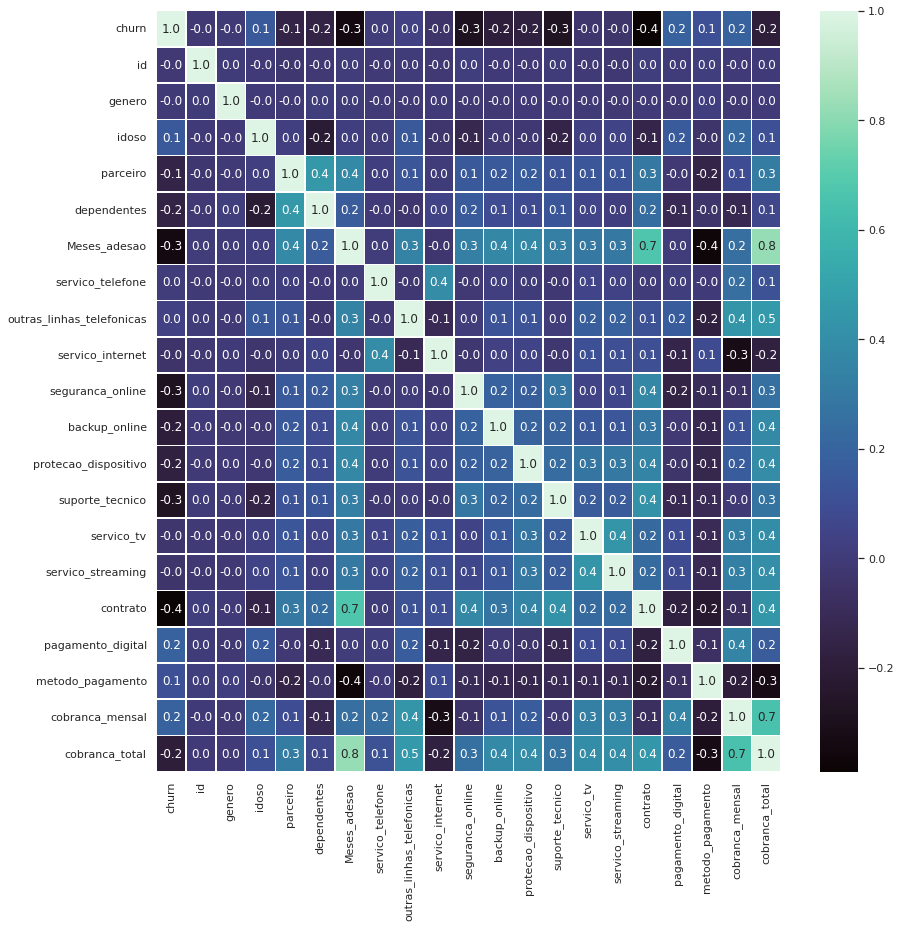

In [ ]:
# matriz de correlação
plt.figure(figsize=(14,14))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6, cmap='mako')
plot